# Ejercicio 3 Final

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar el dataset completo
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape del set de entrenamiento:", X_train.shape)
print("Shape del set de prueba:", X_test.shape)


Shape del set de entrenamiento: (60000, 28, 28)
Shape del set de prueba: (10000, 28, 28)


### Preprocesamiento

In [2]:
from sklearn.preprocessing import Binarizer, StandardScaler, MinMaxScaler

# Aplanar las imágenes de 28x28 a 784 características (1D)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

print("Shape del set de entrenamiento:", X_train_flattened.shape)
print("Shape del set de prueba:", X_test_flattened.shape)

# Escalar los valores de los píxeles entre 0 y 1
X_train_normalized = X_train_flattened / 255.0
X_test_normalized = X_test_flattened / 255.0

# Binarizar las imágenes con un umbral de 127
binarizer = Binarizer(threshold=127)
X_train_binarized = binarizer.fit_transform(X_train_flattened)
X_test_binarized = binarizer.transform(X_test_flattened)

# Estandarizar las imágenes (media 0, desviación estándar 1)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_flattened)
X_test_standardized = scaler.transform(X_test_flattened)

# Escalar las imágenes entre 0 y 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

from sklearn.metrics import accuracy_score
import time

# Diccionario de datasets a probar (ya definidos previamente)
datasets = {
    "Raw (sin normalizar)": X_train_flattened,
    "Normalizado (/255)": X_train_normalized,
    "Binarizado": X_train_binarized,
    "Estandarizado (Z-score)": X_train_standardized,
    "Min-Max Scaling": X_train_scaled
}

test_sets = {
    "Raw (sin normalizar)": X_test_flattened,
    "Normalizado (/255)": X_test_normalized,
    "Binarizado": X_test_binarized,
    "Estandarizado (Z-score)": X_test_standardized,
    "Min-Max Scaling": X_test_scaled
}

Shape del set de entrenamiento: (60000, 784)
Shape del set de prueba: (10000, 784)


## Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

total_accuracy = 0
total_train_time = 0
total_predict_time = 0
n = len(datasets)

# Evaluar cada tipo de preprocesamiento
for nombre, X_train_version in datasets.items():
    print(f"\n🌲 Evaluando con Random Forest: {nombre}")
    
    # Crear modelo
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Entrenamiento
    start_train = time.time()
    model.fit(X_train_version, y_train)
    train_time = time.time() - start_train
    
    # Predicción
    X_test_version = test_sets[nombre]
    start_predict = time.time()
    y_pred = model.predict(X_test_version)
    predict_time = time.time() - start_predict

    # Calcular precisión
    acc = accuracy_score(y_test, y_pred)

    total_accuracy += acc
    total_train_time += train_time
    total_predict_time += predict_time

    # Resultados
    print(f"✅ Precisión: {acc * 100:.2f}%")
    print(f"🛠️ Tiempo de entrenamiento: {train_time:.2f} segundos")
    print(f"🔎 Tiempo de predicción: {predict_time:.2f} segundos")

# Promedios
avg_accuracy_RandomForest = (total_accuracy / n) * 100
avg_train_time_rf = total_train_time / n
avg_predict_time_rf = total_predict_time / n

print(f"\n📊 Promedio con Random Forest:")
print(f"🔢 Precisión promedio: {avg_accuracy_RandomForest:.2f}%")
print(f"🛠️ Tiempo promedio de entrenamiento: {avg_train_time:.2f} segundos")
print(f"🔎 Tiempo promedio de predicción: {avg_predict_time:.2f} segundos")


🌲 Evaluando con Random Forest: Raw (sin normalizar)
✅ Precisión: 97.05%
🛠️ Tiempo de entrenamiento: 41.23 segundos
🔎 Tiempo de predicción: 0.33 segundos

🌲 Evaluando con Random Forest: Normalizado (/255)
✅ Precisión: 97.04%
🛠️ Tiempo de entrenamiento: 40.42 segundos
🔎 Tiempo de predicción: 0.31 segundos

🌲 Evaluando con Random Forest: Binarizado
✅ Precisión: 96.60%
🛠️ Tiempo de entrenamiento: 20.22 segundos
🔎 Tiempo de predicción: 0.33 segundos

🌲 Evaluando con Random Forest: Estandarizado (Z-score)
✅ Precisión: 97.04%
🛠️ Tiempo de entrenamiento: 40.66 segundos
🔎 Tiempo de predicción: 0.32 segundos

🌲 Evaluando con Random Forest: Min-Max Scaling
✅ Precisión: 97.04%
🛠️ Tiempo de entrenamiento: 40.64 segundos
🔎 Tiempo de predicción: 0.33 segundos

📊 Promedio con Random Forest:
🔢 Precisión promedio: 96.95%
🛠️ Tiempo promedio de entrenamiento: 41.28 segundos
🔎 Tiempo promedio de predicción: 0.36 segundos


In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar variables para los promedios
total_accuracy_knn = 0
total_train_time_knn = 0
total_predict_time_knn = 0
n = len(datasets)

# Evaluar cada tipo de preprocesamiento
for nombre, X_train_version in datasets.items():
    print(f"\n👟 Evaluando con KNN: {nombre}")
    
    # Crear modelo KNN
    model_knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
    
    # Entrenamiento
    start_train = time.time()
    model_knn.fit(X_train_version, y_train)
    train_time = time.time() - start_train
    
    # Predicción
    X_test_version = test_sets[nombre]
    start_predict = time.time()
    y_pred_knn = model_knn.predict(X_test_version)
    predict_time = time.time() - start_predict

    # Calcular precisión
    acc_knn = accuracy_score(y_test, y_pred_knn)

    total_accuracy_knn += acc_knn
    total_train_time_knn += train_time
    total_predict_time_knn += predict_time

    # Resultados
    print(f"✅ Precisión: {acc_knn * 100:.2f}%")
    print(f"🛠️ Tiempo de entrenamiento: {train_time:.2f} segundos")
    print(f"🔎 Tiempo de predicción: {predict_time:.2f} segundos")

# Promedios
avg_accuracy_knn = (total_accuracy_knn / n) * 100
avg_train_time_knn = total_train_time_knn / n
avg_predict_time_knn = total_predict_time_knn / n

print(f"\n📊 Promedio con KNN:")
print(f"🔢 Precisión promedio: {avg_accuracy_knn:.2f}%")
print(f"🛠️ Tiempo promedio de entrenamiento: {avg_train_time_knn:.2f} segundos")
print(f"🔎 Tiempo promedio de predicción: {avg_predict_time_knn:.2f} segundos")




👟 Evaluando con KNN: Raw (sin normalizar)
✅ Precisión: 96.88%
🛠️ Tiempo de entrenamiento: 0.00 segundos
🔎 Tiempo de predicción: 15.51 segundos

👟 Evaluando con KNN: Normalizado (/255)
✅ Precisión: 96.88%
🛠️ Tiempo de entrenamiento: 0.05 segundos
🔎 Tiempo de predicción: 11.56 segundos

👟 Evaluando con KNN: Binarizado
✅ Precisión: 95.74%
🛠️ Tiempo de entrenamiento: 0.00 segundos
🔎 Tiempo de predicción: 15.28 segundos

👟 Evaluando con KNN: Estandarizado (Z-score)
✅ Precisión: 94.43%
🛠️ Tiempo de entrenamiento: 0.07 segundos
🔎 Tiempo de predicción: 9.07 segundos

👟 Evaluando con KNN: Min-Max Scaling
✅ Precisión: 96.88%
🛠️ Tiempo de entrenamiento: 0.07 segundos
🔎 Tiempo de predicción: 7.92 segundos

📊 Promedio con KNN:
🔢 Precisión promedio: 96.16%
🛠️ Tiempo promedio de entrenamiento: 0.04 segundos
🔎 Tiempo promedio de predicción: 11.87 segundos


### Cuadro comparativo

📊 Cuadro comparativo de modelos:

    Algoritmo  Precisión (%)  Tiempo de Entrenamiento (s)  Tiempo de Predicción (s)
Random Forest         96.954                    36.634861                  0.326695
          KNN         96.162                     0.040241                 11.868270


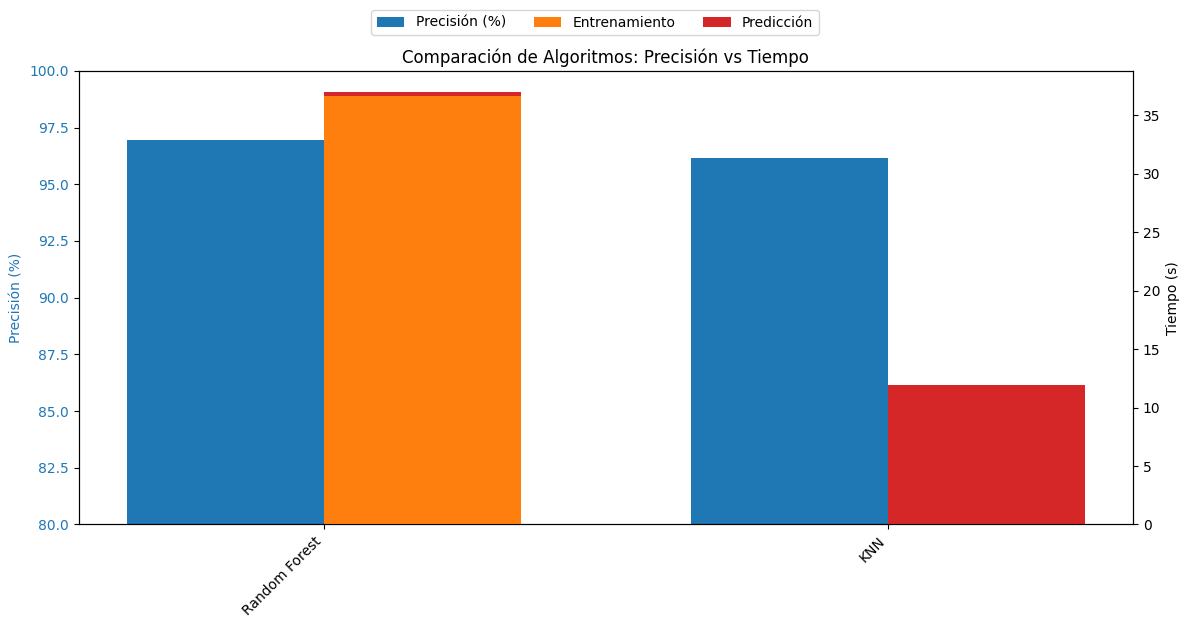

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos promedio (asegurate de tener estos valores definidos previamente)
data = {
    'Algoritmo': [
        'Random Forest',
        'KNN',
    ],
    'Precisión (%)': [
        avg_accuracy_RandomForest,
        avg_accuracy_knn,
    ],
    'Tiempo de Entrenamiento (s)': [
        avg_train_time_rf,
        avg_train_time_knn,
    ],
    'Tiempo de Predicción (s)': [
        avg_predict_time_rf,
        avg_predict_time_knn,
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar tabla
print("📊 Cuadro comparativo de modelos:\n")
print(df.to_string(index=False))

# ------------------------------
# 📈 Gráfico de comparacion
# ------------------------------

fig, ax1 = plt.subplots(figsize=(12, 6))
x = range(len(df))
width = 0.35

# --- Barras de Precisión (eje izquierdo) ---
color_acc = 'tab:blue'
bars1 = ax1.bar([i - width/2 for i in x], df['Precisión (%)'], width=width, label='Precisión (%)', color=color_acc)
ax1.set_ylabel('Precisión (%)', color=color_acc)
ax1.tick_params(axis='y', labelcolor=color_acc)
ax1.set_ylim(80, 100)

# --- Barras apiladas de Tiempo (eje derecho) ---
ax2 = ax1.twinx()
color_train = 'tab:orange'
color_pred = 'tab:red'
bars_train = ax2.bar([i + width/2 for i in x], df['Tiempo de Entrenamiento (s)'], width=width, label='Entrenamiento', color=color_train)
bars_pred = ax2.bar([i + width/2 for i in x], df['Tiempo de Predicción (s)'], width=width,
                    bottom=df['Tiempo de Entrenamiento (s)'], label='Predicción', color=color_pred)
ax2.set_ylabel('Tiempo (s)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# --- Etiquetas y leyenda ---
ax1.set_xticks(x)
ax1.set_xticklabels(df['Algoritmo'], rotation=45, ha='right')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.title('Comparación de Algoritmos: Precisión vs Tiempo')
plt.tight_layout()
plt.show()